# **Project Name**    - Airbnb EDA



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**Nitin Pal
##### **Team Member 2 -**Shristhi Patel

# **Project Summary -**

Airbnb is an American San Francisco based company that opens a platform for short term homestays and new experiences. The company acts like a mediator and charges a commission from each booking. Airbnb is a short name for Air Bed and Breakfast. They company provides homestays and ensures a good stay for the tourist. There are many factors involved for a listing to perform well like location, minimum duration of stay, rent price etc. In this project we'll do the exploratory data analysis and find out which factors contributes more, which listings, locations are prefered more and what prices tourists expect for those locations. The answers to these are important because only if we know these things then only Airbnb can focus on the problems and make stays better.

# **GitHub Link -**

https://github.com/palnitin12345/Airbnb-EDA.git

# **Problem Statement**


**How to grow business positively**

# ***Let's Begin !***

## 1. Know you data

In [18]:
#Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from scipy import stats

import datetime
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")
import requests
import io
    

In [19]:

# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/palnitin12345/Airbnb-EDA/main/Airbnb%20NYC%202019.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

dataset = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [20]:
# Dataset Rows & Columns count

print(f'Shape of first dataset {dataset.shape}')

Shape of first dataset (48895, 16)


In [21]:
#Dataset info
#Looking the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Duplicate Values

In [22]:
#Number of duplicated Rows

len(dataset[dataset.duplicated()])

0

Missing/Null Values

In [23]:
#Finding null columns in the dataset and percentage of null values.
print("Col     Null values percent")
for col in dataset.columns:
  if dataset[col].notnull().sum() != len(dataset):
    print(f"{col}  :- {round(dataset[col].isnull().sum()*100/len(dataset),2)}")

Col     Null values percent
name  :- 0.03
host_name  :- 0.04
last_review  :- 20.56
reviews_per_month  :- 20.56


### What did you know about your dataset?

## 2. Understanding Your Variables

In [24]:
#Lets check for columns name

dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
# Dataset Describe

dataset.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


Variables Description 

1.  **id** :-  Unique id of a booking
2.  **name** :- name of the place/listing
3.  **host_id** :- ID of the host.
4.	**host name**:- The name of the owner of listing.
5.	**neigbhourhood_group**:- city of the listing.
6.	**neigbhourhood**:- the area in which listing falls.
7.	**latitude**:- latitude cordinates of the listing
8.	**longitude**:- longitude cordinates of the listing
9.	**room_type**:- kind of room.
10.	**price**:- price of one night of the listing
11.	**minimum nights**:- minimum number of nights for which you can book.
12.	**number of reviews**	:- total number of reviews it got until now.
13. **last review**:- when was this listing last reviewed.
14.	**reviews last month**:- number of reviews this listing got in last month.
15.	**calculated host listings count**:- How many more listings that host has!
16.	**availability 365**:- How many days listing is available in a year!

Unique Values

In [26]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),)

No. of unique values in  id is 48895
No. of unique values in  name is 47905
No. of unique values in  host_id is 37457
No. of unique values in  host_name is 11452
No. of unique values in  neighbourhood_group is 5
No. of unique values in  neighbourhood is 221
No. of unique values in  latitude is 19048
No. of unique values in  longitude is 14718
No. of unique values in  room_type is 3
No. of unique values in  price is 674
No. of unique values in  minimum_nights is 109
No. of unique values in  number_of_reviews is 394
No. of unique values in  last_review is 1764
No. of unique values in  reviews_per_month is 937
No. of unique values in  calculated_host_listings_count is 47
No. of unique values in  availability_365 is 366


In [27]:
#Columns that are categorical in nature

for col in dataset.columns:
  if dataset[col].nunique()<=10:
    print(col)
    print(dataset[col].value_counts())
    print('')

neighbourhood_group
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

room_type
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64



## 3. Data Wrangling

In [28]:
dataset['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Null Values treatment

In [29]:
#We have two columns that have null values. Those are [last_review, reviews_per_month].
#We'll have to fill them with appropriate values

print(f"Percent of null values in both the columns are: {round(dataset['last_review'].isnull().sum()*100/len(dataset),2)}")

Percent of null values in both the columns are: 20.56


In [30]:
#Calculating the age of the last review.
#For that changing the datatype of last review to datetime

dataset['last_review'] = pd.to_datetime(dataset['last_review'])

#CAlculating age of now

dataset['last_review_age'] = (pd.Timestamp('now') - dataset['last_review']).dt.days

In [31]:
#Filling null values in reviews per month column.

dataset['reviews_per_month'].replace(np.nan, dataset['reviews_per_month'].mean())

#Filling null values in last_review_age column.

dataset['last_review_age'] = dataset['last_review_age'].replace(np.nan, int(dataset['last_review_age'].mean()))

#Filling the zero values in number of reviews with median

dataset['number_of_reviews'] = dataset['number_of_reviews'].replace(np.nan, dataset['number_of_reviews'].median())


In [32]:
#Since minimum price cannot be 0 beacuse no one would rent their place for free, so removing those rows.


dataset = dataset[dataset['price']!=0]


In [33]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

l_min, h_min, percent_min = calculate_outlier(dataset,'minimum_nights')

In [34]:
#Minimum nights max is too great, so capping it with upper percentile

dataset['minimum_nights'].loc[dataset['minimum_nights']>=h_min] = h_min

## 4. DATA VISUALISATION

#### Chart 1 : Neigbhourhood Group Exploration

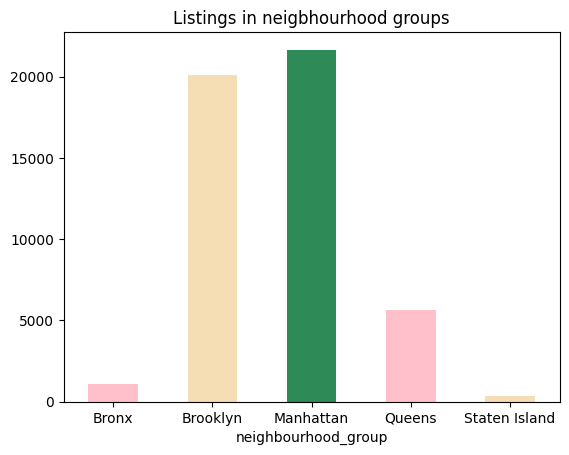

In [35]:
#Chart 1 - visualization code

#Types of neigbhourhood groups

dataset['neighbourhood_group'].value_counts().sort_index().plot(kind='bar', color = ['pink','wheat','seagreen'])
plt.title("Listings in neigbhourhood groups")
plt.xticks(rotation = 0) 
plt.show()

1. Why did you pick the specific chart?

We have used bar chart here because it distinctly shows the difference in levels of one category in comparison to others. Like it here shows the huge difference very profoundly.

 2. What is/are the insight(s) found from the chart?

We can see that most of the AirBnb listings are majorly from Brooklyn and Manhattan neigbhourhood groups. While Queens, Staten Island and Bronx have very less listings. 
This maybe due to less number of reviews or maybe due to poor facilities.  

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Airbnb can promote the neigbhourhood with low listings, like offer some discount from their commission to boost the property listings.

#### Chart 2: Room Type Preferences

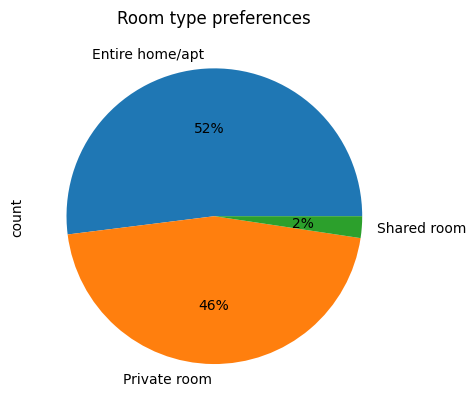

In [36]:
#Chart 2 - visualization code

#Room type preferences

dataset['room_type'].value_counts().sort_index().plot(kind='pie', autopct='%.0f%%')
plt.title("Room type preferences")
plt.xticks(rotation = 0) 
plt.show()

1. Why did you pick the specific chart?

Pie chart is used to show the difference in percentages in different categories. In the above chart we needed to show how many people prefers one type of room over another. That is why we used pie chart.

 2. What is/are the insight(s) found from the chart?

The above graph clearly indicates that most of the hosts prefer listing Entire home or Private rooms. Very few of the hosts give out shared rooms.
The demand of private space can account for this huge difference. No one would want to share room with an unknown so easily, this can also be a reason.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To get more bookings, Airbnb should encourage the hosts to list more Private room and Entire home type rooms. Depending on the location Airbnb can hint hosts to list their rooms. Like near a tourist place Private room/Entire home would be suitable and near a college/hospital a shared room can be opted.

#### Chart 3 : Number of reviews

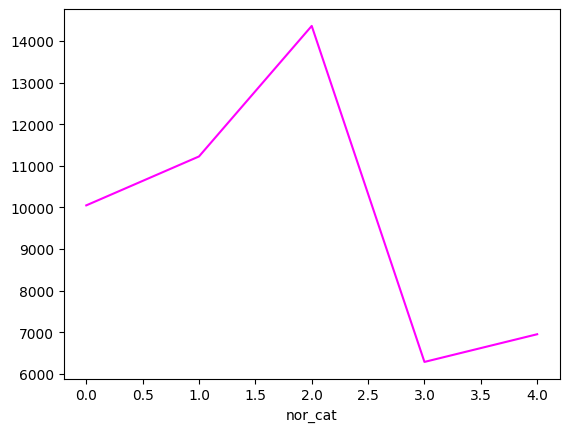

nor_cat
0    10051
1    11226
2    14362
3     6290
4     6955
Name: count, dtype: int64

In [37]:
#Chart 3 - visualisation code

#categorising the number of reviews columns
dataset['nor_cat'] = dataset['number_of_reviews'].apply(lambda x:0 if x<1 else(1 if 1<=x<=3 else ( 2 if 3<=x<=20 else ( 3 if 20<=x<=50 else 4 ))))

# zero reviews--0
# between 1 and 3 reviews --1
# between 3 and 20 ---2
# between 20 and 50 ---3
# more than 50 ---4

#Plottting

dataset['nor_cat'].value_counts().sort_index().plot(kind='line',color='magenta')
plt.show()

dataset['nor_cat'].value_counts().sort_index()

1. Why did you pick the specific chart?

Line Chart is perfect for showing trends/ patterns in the data. Be it small dataset or large datasets. Here we have used line chart to see how many listings got how many reviews. We can safely assume more reviews means more bookings.

 2. What is/are the insight(s) found from the chart?

We can see above that most of the listings got reviews between 3 and 30. There are 1000 listings with 0 reviews, this means the host needs to change some conditions/restrictions like price to get some bookings.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

While booking a room/apartment what a customer sees is the reviews. Better reviews will attract more tourists while bad reviews will turn away the tourists. Thus, Airbnb should recommends home/apartments with good reviews only so that a tourist would book from Airbnb again and again.

#### Chart 4 : Average room price by locality(Neigbhourhood groups)

#### Chart 5 : Price according to room

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64


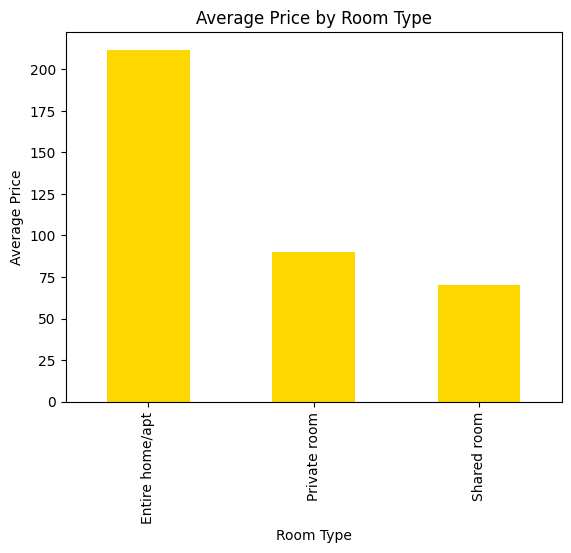

In [38]:
# Chart - 5 - visualisation code

 # Calculate average price by room type
price_by_room_type = dataset.groupby('room_type')['price'].mean()
print(price_by_room_type)
# Plot bar chart of average price by room type

price_by_room_type.plot(kind='bar', color='gold') 
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()



 1. What is/are the insight(s) found from the chart?

It is found from the data that people prefer Entire home or Apartments more than other room types. This can be mainly linked to independence of the house to the tenant which shared room or private room cannot provide sufficiently.
That is why tenant chose to pay more for Entire home.


 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A customer feels satisfied when he gets a good space for a good price. That is why the price of a listing should be according to the room/apartment. Inflating price would be a bad business for Airbnb for a poor facilitated listing. Thus to get more bookings Airbnb should offer price according to the facilities and room to the tenant.

#### Chart 6 : How long a stay should be?

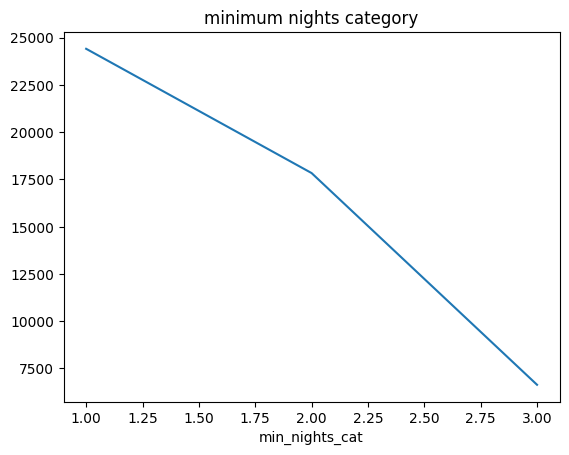

min_nights_cat
1    24410
2    17836
3     6638
Name: count, dtype: int64

In [39]:
#Chart 6 - visualisation code


dataset['min_nights_cat'] = dataset['minimum_nights'].apply(lambda x: 1 if x<=2 else ( 2 if 3<=x<=10 else ( 3 if 11<=x<=50 else 4 )))

#Minimum nights category
# less than 3 days - 1
# between 3 and 10 days --2
# between 11 and 50 days --3
# more than 50 days --4

dataset['min_nights_cat'].value_counts().sort_index().plot(kind='line')
plt.title("minimum nights category")
plt.show()

dataset['min_nights_cat'].value_counts().sort_index()

1. Why did you pick the specific chart?

We have used line chart because it shows the trend in data. Here it clearly shows a decreasing trend which implies and inverse relationship.

 2. What is/are the insight(s) found from the chart?

What we observed from the graph is that most of the listings have minimum nights less than two days. And there are less listings with high minimum nights restriction. Less minimum nights restriction would attract toursits, so the lesser the restriction the better the chances of business growing.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Minimum number of days should be as low as possible as this will give some freedom to the tourist and can live in his desired flat according to his travel needs. 
this can affect a business as if a tourists wants to stay for 2 days and the minimum nights for booking is three, then he might check on other websites or different locations. That is why regulating this thing is important.

#### Chart 7: Overpaying? 

#### Chart 8 : Which room is available throghout the year?

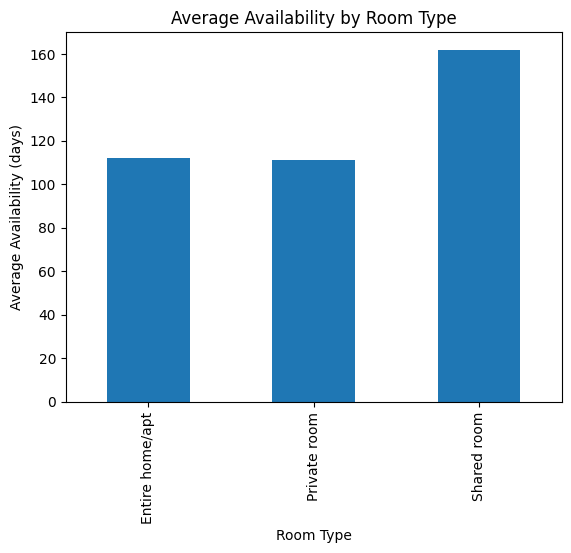

In [40]:

# Chart - 8 visualization code

room_type_by_availability = dataset.groupby('room_type')['availability_365'].mean() # Calculate average availability by room type
room_type_by_availability.plot(kind='bar') # Plot bar chart of average availability by room type
plt.title('Average Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (days)')
plt.show()

 1. What is/are the insight(s) found from the chart?

We can see that Shared rooms are avaiable throughout the year indicating these are kind of hostels or PG, where people stay for a long time.
The other two categories are available less than half of the year. These listings could be open only in the high toursists time. Kind of seasonal business operators.

 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Airbnb can recommend Entire home/Private rooms to travellers, people who oftenly book. This can help a user to save his/her time.

#### Chart 9:Top three hosts?

          host_name    host_id  total_price
33220  Sonder (NYC)  219517861        82795
4857     Blueground  107434423        70331
31227         Sally  156158778        37097


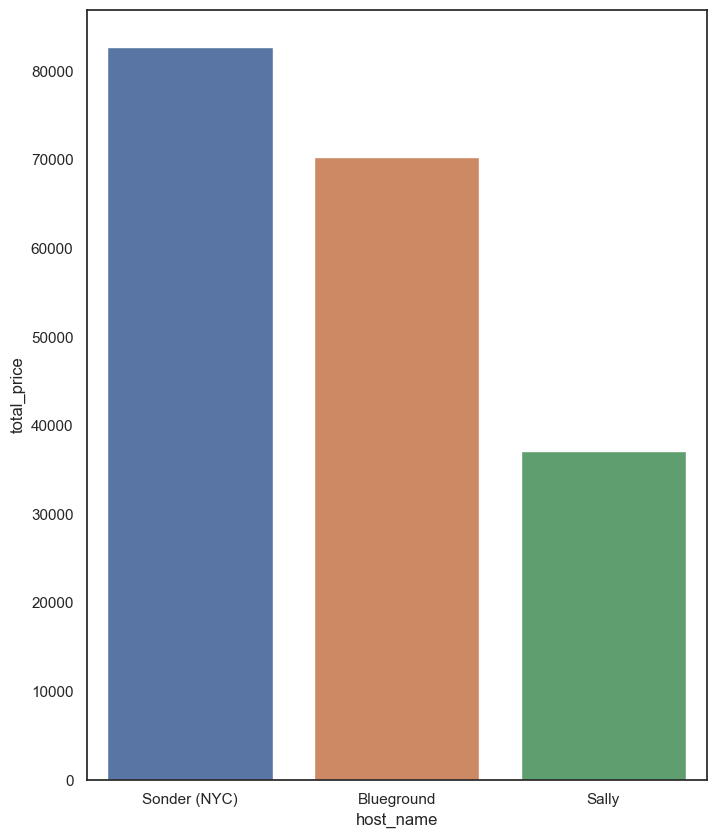

In [41]:
#chart 14
#  find the maximum price across different host name
top_host=dataset.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_host.head()
#top_host.info()
# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
print(top_3)
sns.set(rc={'figure.figsize':(8,10)})
sns.set_style('white')
abc= sns.barplot(x='host_name',y='total_price',data = top_3)
#abc.set_title('three hosts based on their turnover')
#abc.set_ylabel('host name', Weight='bold')
#abc.set_xlabel('total price', Weight='bold')

#abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')
     

Insights:- We can see that these three hosts got the maximum of listings and give a huge business to Airbnb. So these hosts should be specially taken care of by discounts, offers and sending more bookings towards them. This would in turn motivate them to list more home/apartments and would be fruitful to  Airbnb again.

#### Chart 10 : Which neigbhorhood has maximum reviews?



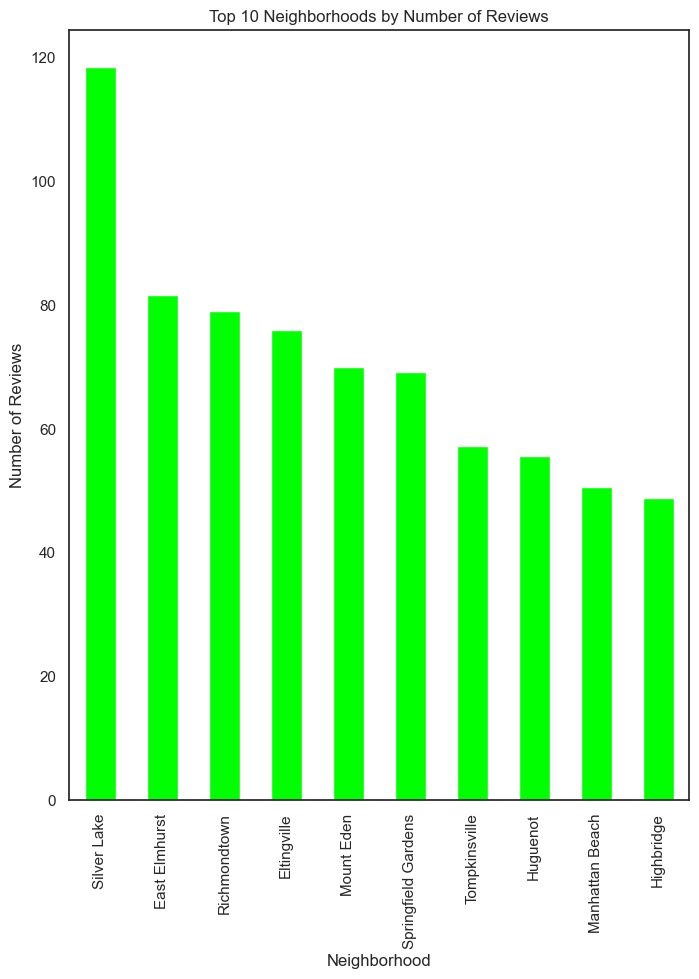

In [42]:
# Chart - 10 visualization code
# Analyze data
reviews_by_neighborhood = dataset.groupby('neighbourhood')['number_of_reviews'].mean() # Calculate total number of reviews by neighborhood
reviews_by_neighborhood.nlargest(10).plot(kind='bar',color='lime') # Plot bar chart of top 10 neighborhoods by number of reviews
plt.title('Top 10 Neighborhoods by Number of Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.show()

 1. What is/are the insight(s) found from the chart?

Reviews acts like a game changer while booking for a location. Even few bad reviews can decrease bookings drastically. The above 10 neigbhorhood have the maximum reviews. Getting more reviews help a user to decide which room he should go for.

 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


To see a positive growth in the business AirBnb should put a great deal in making the reviews good. The places with bad reviews should be kept in check and the places with best reviews should be recommended. The areas with more reviews should be on the top of the list. This would keep them safe and customers will be happy too. This will help in retaining the user.

#### Chart 11 : Which neigbhourhood has most availability?

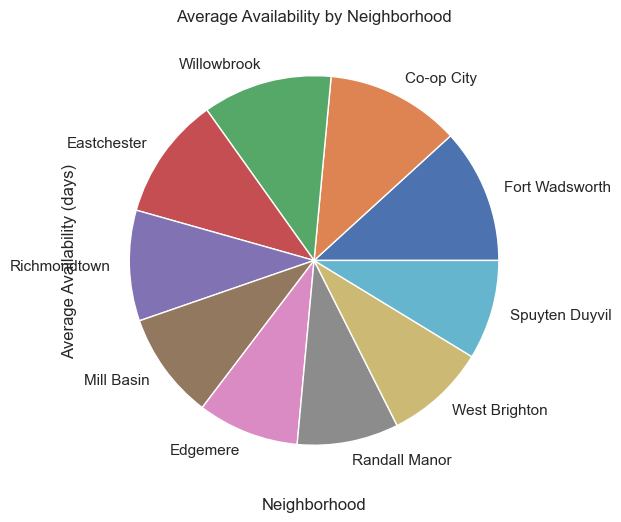

In [43]:
# Chart - 11 visualization code
availability_by_neighborhood = dataset.groupby('neighbourhood')['availability_365'].mean() # Calculate average availability by neighborhood
availability_by_neighborhood = availability_by_neighborhood.sort_values(ascending=False)[:10] # Select top 10 neighborhoods with highest average availability
availability_by_neighborhood.plot(kind='pie', figsize=(12,6)) # Plot bar chart of average availability by neighborhood
plt.title('Average Availability by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Availability (days)')
plt.show()

1. Why did you pick the specific chart?

We have chosen pie chart because it represents data as a part of whole. Here we needed how much one category occupies the space of the total. 

 2. What is/are the insight(s) found from the chart?

These are the neigbhourhoods that are available throughout most of the year. AirBnb can suggest these places more and attract crowd towards this place for a positive growth in buisiness. Availability plays an important role as the more it is available the more revenue Airbnb generates.

#### Chart 12 : Reviews affects price

#### Chart 13 : Which rooms in which neigbhorhood are expensive?

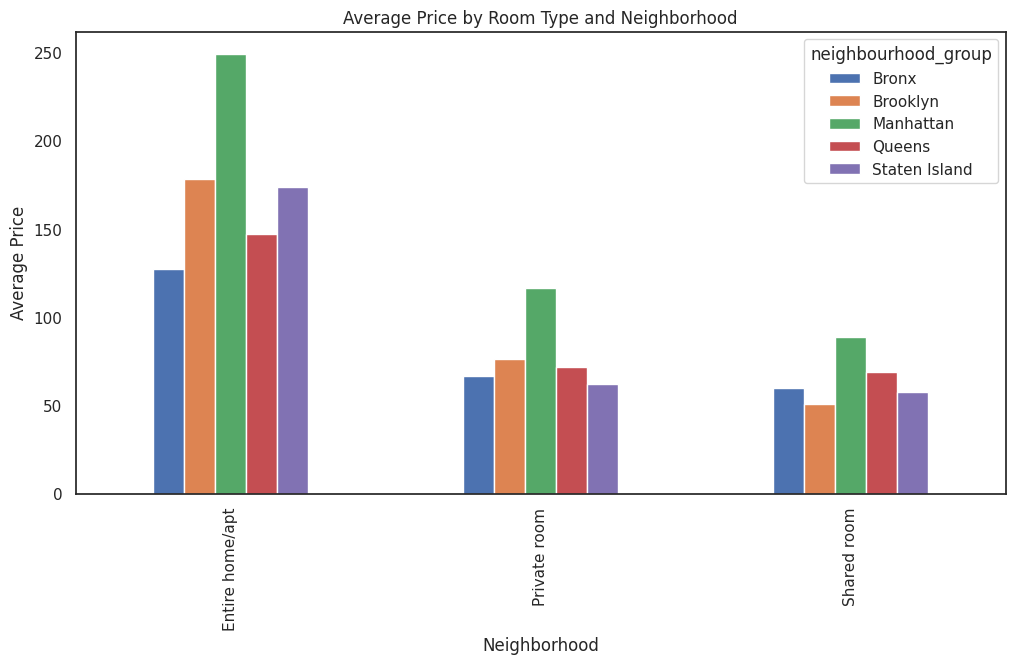

In [ ]:
# Chart - 13 visualization code

price_by_room_type_and_neighborhood = dataset.groupby(['room_type', 'neighbourhood_group'])['price'].mean() # Calculate average price by room type and neighborhood
price_by_room_type_and_neighborhood = price_by_room_type_and_neighborhood.unstack() # Reshape data to make it easier to plot
price_by_room_type_and_neighborhood.plot(kind='bar', figsize=(12,6)) # Plot bar chart of average price by room type and neighborhood
plt.title('Average Price by Room Type and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

1. Why did you pick the specific chart?

We have used grouped bar chart so that we can showing altogether which room type is expensive in which area and at the same time compare it with other areas too.

 2. What is/are the insight(s) found from the chart?

We can see from the above grouped bar chart that Manhattan has the most expensive rooms of all types. Entire room costs almost twice than in any other neigbhorhood. While Bronx has the cheapest private room and entire homes while brooklyn has the cheapest shared room. Shared room are the cheapest in all of the neigbhorhoods. 

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To create more revenue, Airbnb can recommend expensive places of Manhattan, keeping the need of user in mind. The other places which are at prime location their prices can be regulated to get better sales. 

#### Chart 14 :Multicollinearity

<Axes: >

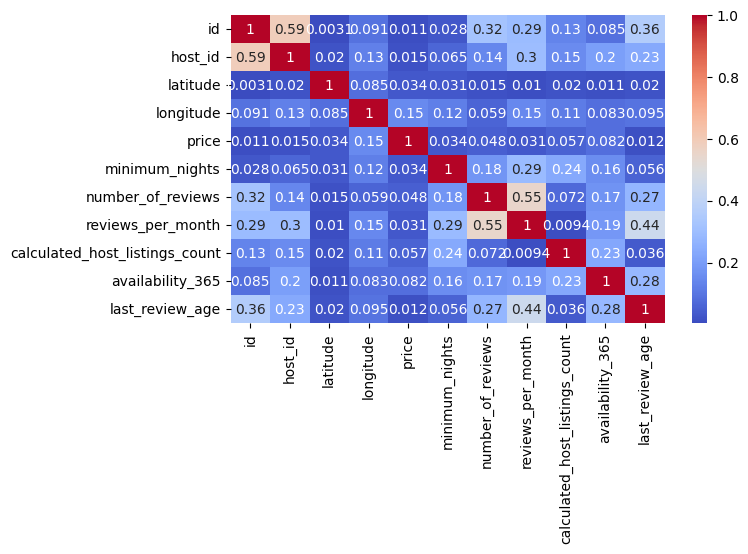

In [ ]:
# Chart - 12 visualization code

 ## Correlation
plt.figure(figsize=(7,4))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

1. Why did you pick the specific chart?

A correlation map is kind of a matrix which shows the dependency of each variable on every other variables. This table has correlation coefficients which shows the correlation between two variables.
The value of correlation lies between -1 and 1. Where 1 shows the maximum correlaion possible and -1 the least. This map is used to summarize data and with the help of it we can select/deselect features according to need. 


 2. What is/are the insight(s) found from the chart?

The insights we got from above are:-
1. The reviews per month and number of reviews are moderately correlated because reviews a place gets affects number of reviews. Kind of a linear relationship.
2. The host_id and id have a high correlation coefficient and this is because every listing is linked to a host which is given a host id. SO they represent information about a same person.

#### Chart 15 : Pair plot

In [ ]:
#Pair plot
sns.pairplot(dataset)

1. Why did you pick the specific chart?

A pair plot expresses the important features to explain the relationship between the two variables. It helps to form very simple classififcation models by making simple graphs and showing linear separation in data. Therefore, we used a pair plot to check out the patterns, relations and variations between the features of our dataset.
 It is somewhat same as correlation but it shows pictorially whereas correlation map shows the difference numerically.

# CONCLUSION



1: Manhattan is the most focused place in New York for hosts to do their business

2:most of the AirBnb listings are majorly from Brooklyn and Manhattan neigbhourhood groups. While Queens, Staten Island and Bronx have very less listing.

3:For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $212, for shared room is around 70, and for private room is around 90.

4:'Entire home/apt' room type has the highest number of listing and ‘Shared Room’ is the least listed room type.

5:People stay for longer duration of time in Private rooms in Brooklyn and Manhattan.

6:Top three host base on their turnover are Sonder (NYC, Blueground ,Sally.


7:most of the listings have minimum nights less than two days. And there are less listings with high minimum nights restriction. Less minimum nights restriction would attract toursits, so the lesser the restriction the better the chances of business growing.

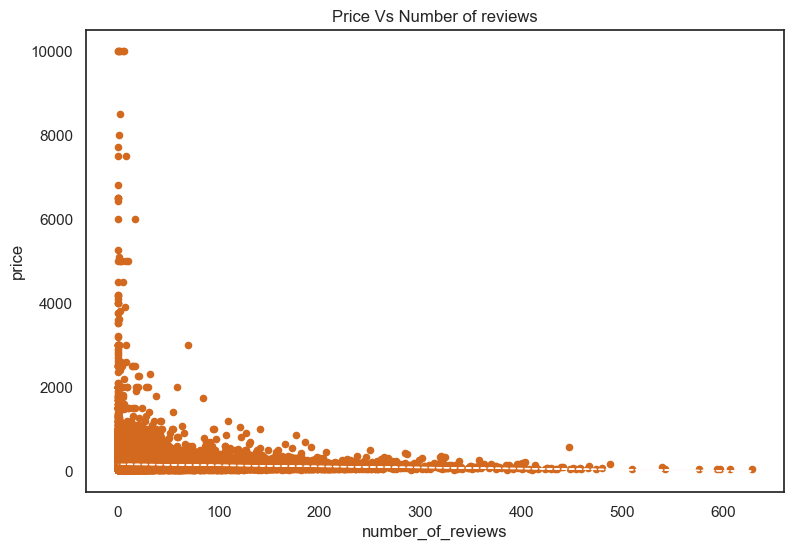

In [44]:
#Chart 12

#Plotting the scatter plot
dataset.plot(kind="scatter", x="number_of_reviews",y="price",title="Price Vs Number of reviews",figsize=(9,6), color = 'chocolate')

#Fitting a line to check linearity
z = np.polyfit(dataset['number_of_reviews'], dataset['price'], 1)
y_hat = np.poly1d(z)(dataset['number_of_reviews'])

#Plotting the line
plt.plot(dataset['number_of_reviews'], y_hat, "r--", lw=1,color = 'snow')

plt.show()

**Insights:**

From the above Analysis we can say that most people prefer to stay in place where price is less.

1. Why did you pick the specific chart?

Scatter plots are best when we need to check for linear relationship. That is why we used the scatter plot here and plotted an approximate fit line using polyfit for better understanding.

 2. What is/are the insight(s) found from the chart?

The cheapest place with bad reviews would never attract tourists while expensive place with best in classs reviews can attract a huge deal.
We can see in the above graph that there are places which are very expensive still got booked. While there are also some places which are cheap and has over than normal amount of reviews. This can mean bad reviews. 

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Airbnb should keep an eye over the reviews. The places getting bad reviews for a long time should be unlisted. They should clusterise reviews and if all indicate towards one point then they should take strict action, as not taking any action can lead to negative affect on business.
Keeping places with bad reviews can repel tourists.

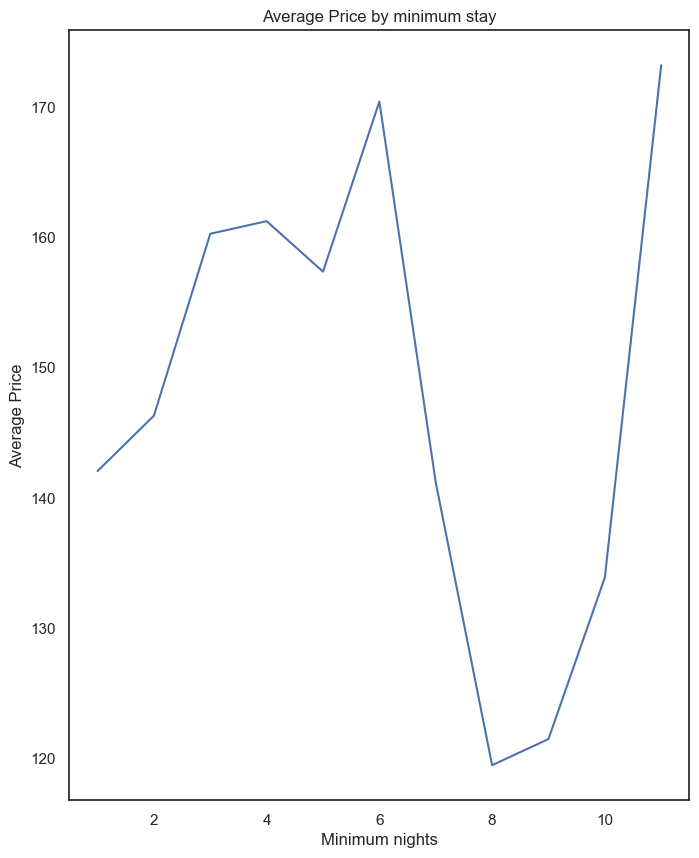

In [45]:
# Chart - 7 - visualisation code

 # Calculate average price vs minimum nights

price_by_min_nights = dataset.groupby('minimum_nights')['price'].mean()

# Plot bar chart of average price vs minimum nights

price_by_min_nights.plot(kind='line') 
plt.title('Average Price by minimum stay')
plt.xlabel('Minimum nights')
plt.ylabel('Average Price')
plt.show()



 1. What is/are the insight(s) found from the chart?

We can observe from the graph that price of a listing is maximum for either 6 days or 11 days or more. The price of rooms with minimum days 8 is very less. 

 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We know price of a listings plays an important role in attracting tourist. So the price should be adjusted accordingly to the minimum number of days for which a booking should be made.  

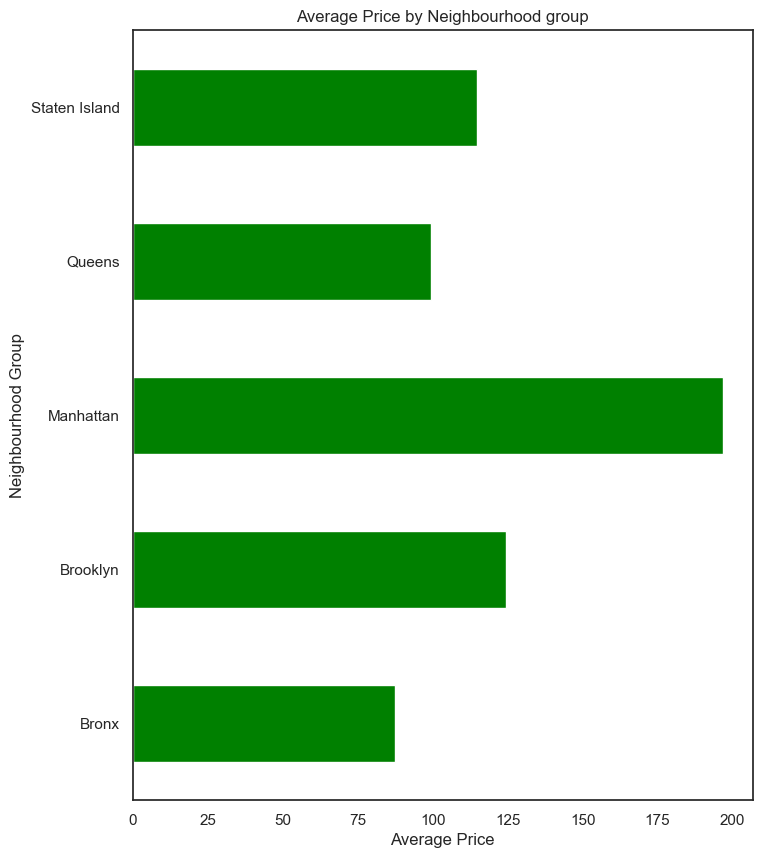

In [46]:
# Chart - 4 visualization code
# Analyze data

price_by_nbd_type = dataset.groupby('neighbourhood_group')['price'].mean() # Calculate average price by room type
price_by_nbd_type.plot(kind='barh', color='green') # Plot bar chart of average price by room type
plt.title('Average Price by Neighbourhood group')
plt.ylabel('Neighbourhood Group')
plt.xlabel('Average Price')
plt.show()



1. Why did you pick the specific chart?

We have used horizontal bar graphs because the labels are easier to display. In addition, they are more suitable for display on a small space in the case of a large data set.
A horizontal bar chart is a graph in the form of rectangular bars.
The length of these bars is proportional to the values they represent. The vertical axis represents the categories being compared, while the horizontal axis represents a value.


 2. What is/are the insight(s) found from the chart?


The average price of listings is very high in Manhattan as the city itself is very costly. The rest of the neigbhourhood areas have nearby same prices.
Airbnb should get the rooms for every price range in these areas so that more and more people can prefer all the areas for positive business growth.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For a tourist the price of a room matters highly. So Airbnb should have some control over the price of a listings based on its location so that there can be more bookings. Like decreasing/increasing commission prices in some localities can boos the business for the area.